Import wymaganych bibliotek


# **Laboratorium 2** - Podstawowe operacje arytmetyczne w analizie danych

In [163]:
import pandas as pd
import numpy as np
import matplotlib as mat
import plotly as pl
import kagglehub
from kagglehub import KaggleDatasetAdapter
import json
import os

In [164]:
data_set_path = "Sleep_health_and_lifestyle_dataset.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uom190346a/sleep-health-and-lifestyle-dataset",
    data_set_path
)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Poodstawowe operacje matematyczne na zbiorze danych:

2.1. Średnia arytmetyczna

In [165]:
np.max(df["Sleep Duration"])

np.float64(8.5)

In [166]:
np.min(df["Sleep Duration"])

np.float64(5.8)

In [167]:
np.mean(df["Sleep Duration"])

np.float64(7.132085561497325)

In [168]:
np.mean(df["Quality of Sleep"])

np.float64(7.31283422459893)

2.2. Mediana


In [169]:
len(df["Sleep Duration"])

374

In [170]:
np.median(df["Sleep Duration"])

np.float64(7.2)

2.3. Odchylenie standardowe


In [171]:
np.std(df["Sleep Duration"])

np.float64(0.7945923066929989)

In [172]:
np.std(df["Quality of Sleep"])

np.float64(1.1953546401942918)

2.4. Wariancja


In [173]:
np.var(df["Sleep Duration"])

np.float64(0.6313769338557008)

In [174]:
np.var(df["Quality of Sleep"])

np.float64(1.4288727158340246)

2.5. Korelacja


In [175]:
np.corrcoef(df["Sleep Duration"], df["Quality of Sleep"])[0,1]

np.float64(0.8832130004106183)

In [176]:
np.corrcoef(df["Sleep Duration"], df["Stress Level"])[0,1]

np.float64(-0.8110230278940433)

2.6. Kowariancja


In [177]:
covariance = np.cov(df["Sleep Duration"], df["Stress Level"])
covariance

array([[ 0.63306963, -1.14509469],
       [-1.14509469,  3.1489441 ]])

In [178]:
np.corrcoef(df["Sleep Duration"], df["Stress Level"])[0,1]

np.float64(-0.8110230278940433)

In [179]:
corelation = covariance[0,1] / (np.sqrt(covariance[0,0]) * np.sqrt(covariance[1,1]))
corelation

np.float64(-0.8110230278940433)

# **Laboratorium 3** - Wizualizacja danych przy użyciu MatPlotLib i innych bibliotek


3.1. Histogram

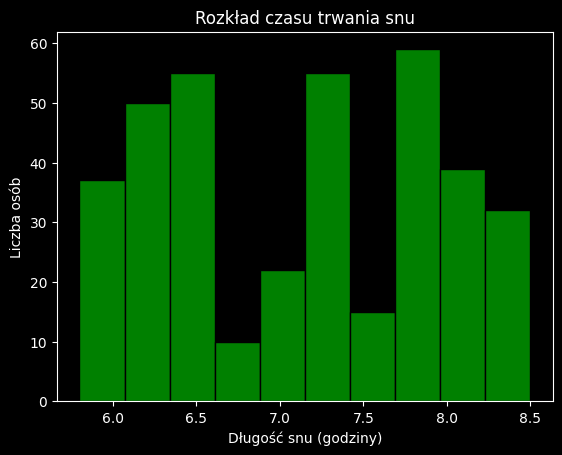

In [180]:
import matplotlib.pyplot as plt
dane = df['Sleep Duration']
plt.hist(dane, bins='auto', color='green', edgecolor='black')
plt.title('Rozkład czasu trwania snu')
plt.xlabel('Długość snu (godziny)')
plt.ylabel('Liczba osób')
plt.show()

3.2. Wykres kołowy

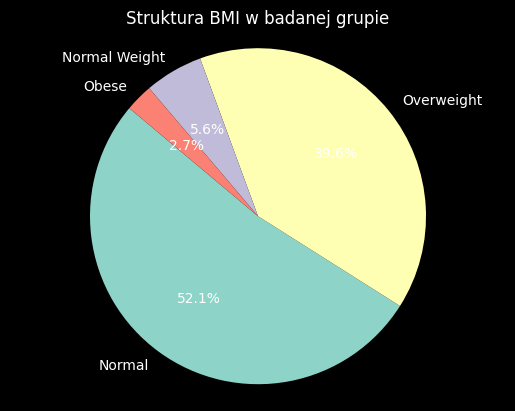

In [181]:


plt.pie(df['BMI Category'].value_counts(), labels=bmi_counts.index, startangle=140, autopct="%1.1f%%")

plt.axis("equal")
plt.title("Struktura BMI w badanej grupie")
plt.show()

3.3. Wykres słupkowy

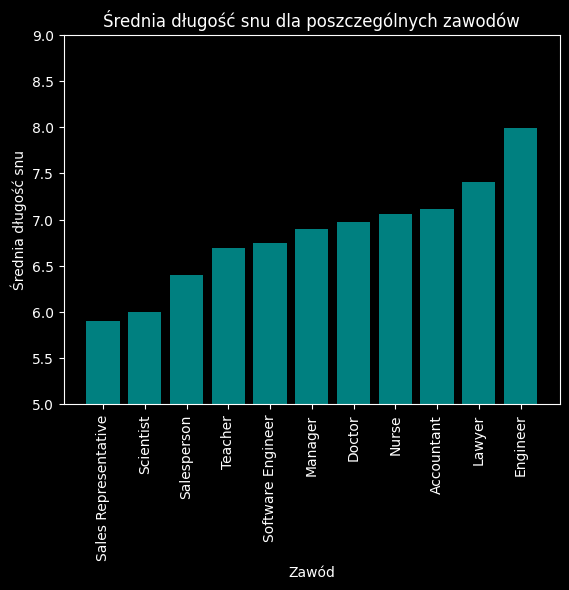

In [182]:
avg_sleep_occ = df.groupby('Occupation')['Sleep Duration'].mean().sort_values()

plt.bar(avg_sleep_occ.index, avg_sleep_occ.values, color='teal')
plt.title('Średnia długość snu dla poszczególnych zawodów')
plt.xlabel('Zawód')
plt.ylabel('Średnia długość snu')
plt.xticks(rotation=90)
plt.ylim(5, 9)
plt.show()

3.4. Wykres punktowy

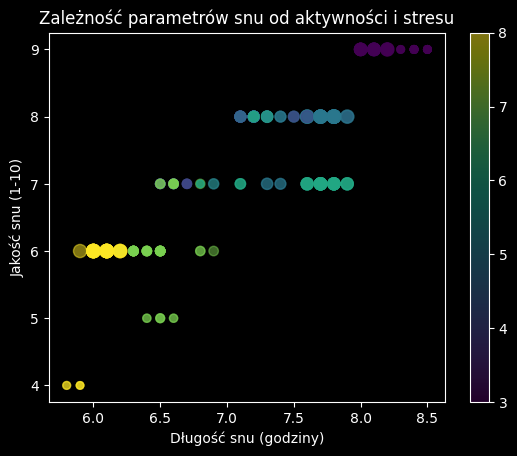

In [185]:
x = df['Sleep Duration']
y = df['Quality of Sleep']
sizes = df['Physical Activity Level']
colors = df['Stress Level']
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5, cmap="viridis")
plt.colorbar()
plt.xlabel("Długość snu (godziny)")
plt.ylabel("Jakość snu (1-10)")
plt.title("Zależność parametrów snu od aktywności i stresu")
plt.show()